In [1]:
# This program implements and evaluates the Covered Call strategy
import pandas as pd
import random
import numpy as np
import bs_module
import statistics

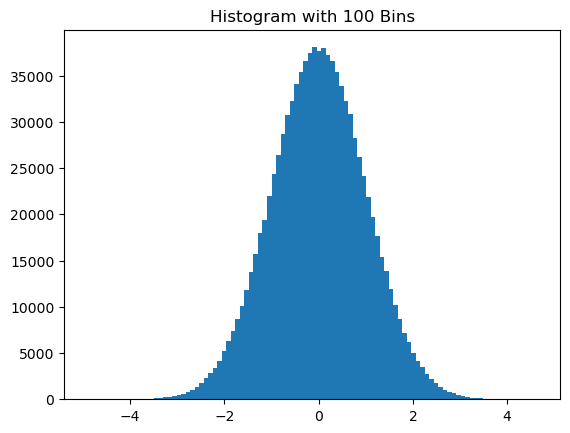

In [11]:
# Set up the random numbers
numran = 1000
np.random.seed(221)
rand_norm_c = np.random.normal(loc=0, scale=1, size=1000000)
import matplotlib.pyplot as plt
plt.hist(rand_norm_c, bins=100)
plt.title("Histogram with 100 Bins")
plt.show()

In [5]:
# Define parameters
strike_vals = [0.95, 1.00, 1.05]
drift_vals = [0.08, 0.12]
Volatility_vals = [0.2, 0.25, 0.3]

In [17]:
S0 = 85 
rf = 0.10 
T = 1 / 12 
numpath = 10000  
strike = strike_vals[1] 
drift = drift_vals[1] 
Volatility = Volatility_vals[1]
#
CoveredCall_Rets = np.zeros((numpath))
St_Ret = np.zeros((numpath))
jcount = 0
lcount = 0
while jcount < numpath:
    S_t = S0
    k0 = int(S0 * strike)
    m0 = 2 / 12  # Maturity in months
    Call_Val = bs_module.bsval(S0, k0, rf, m0, Volatility, 1)  # European call option value
    for kcount in range(12):
        if lcount >= len(rand_norm_c):
            print("Error: ran out of random numbers:/")
            break
        S_t1 = S_t * (np.exp(drift * T + Volatility * np.sqrt(T) * rand_norm_c[lcount]))
#
        #option values for call option
        kt = int(S_t * strike)
        mt = 1 / 12
        CC_t = bs_module.bsval(S_t, kt, rf, mt, Volatility, 1)  
        kt1 = int(S_t1 * strike)
        mt1 = 2 / 12
        CC_t1 = bs_module.bsval(S_t1, kt1, rf, mt1, Volatility, 1)
        if kcount > 10:
            #stock price minus the intrinsic value of the call
            CoveredCall_Val = Call_Val * np.exp(rf / 12) - max(0, S_t1 - k0) + S_t1
            CoveredCall_Rets[jcount] = np.log(CoveredCall_Val / S0)
            St_Ret[jcount] = np.log(S_t1 / S0)    
        if kcount < 11:
            #stock price + option premium
            Call_Val = Call_Val * np.exp(rf / 12) + (CC_t - CC_t1)  
        #update the price
        S_t = S_t1
        lcount += 1
    #check that we didn't exit early cause random number
    if lcount >= len(rand_norm_c):
        print("Terminating program early due to random number exhaustion.")
        break
    #increment jcount after the full thing
    jcount += 1
    if jcount % 1000 == 0:
        print(f"Progress: Completed {jcount} paths out of {numpath}")
print("Total completed paths:", jcount)
print("Risk-free rate (rf):", rf)

Progress: Completed 1000 paths out of 10000
Progress: Completed 2000 paths out of 10000
Progress: Completed 3000 paths out of 10000
Progress: Completed 4000 paths out of 10000
Progress: Completed 5000 paths out of 10000
Progress: Completed 6000 paths out of 10000
Progress: Completed 7000 paths out of 10000
Progress: Completed 8000 paths out of 10000
Progress: Completed 9000 paths out of 10000
Progress: Completed 10000 paths out of 10000
Total completed paths: 10000
Risk-free rate (rf): 0.1


In [8]:
#calculations for mean and standard deviation
mean_s = statistics.mean(St_Ret)
sd_s = statistics.stdev(St_Ret)
mean_cc = statistics.mean(CoveredCall_Rets)
sd_cc = statistics.stdev(CoveredCall_Rets)
print(mean_s, sd_s)
print(mean_cc, sd_cc)

0.12280285469121827 0.25066953460997815
-0.0575437629538355 0.09806268299678397
